In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# Carregar o dataset
df = pd.read_csv ("dados_comerciais.csv")

## Objetivo do Projeto

In [3]:
# - Responder perguntas de negócio com base no dataset comercial fictício 
# - Verificar quais são os 5 produtos mais vendidos
# - Analisar qual a receita total por produto
# - Acompanhar o desempenho das vendas por região
# - Ver o impacto das promoções realizadas nas vendas
# - Observar como as vendas se distribuem ao longo do ano
# - Qual método de pagamento é o mais utilizados pelos clientes
# - Como os descontos estão distribuídos nas vendas
# - Saber o total de vendas por vendedor
# - Qual é a relação entre descontos e quantidade de vendas?

## Perguntas de Negócio ##

### 1. Quais são os 5 produtos mais vendidos?

In [4]:
# Agrupar os dados por 'Product Name' e somar as quantidades de vendas
most_sold_products = df.groupby('Product Name')['Quantity'].sum()

# Ordenar os produtos pela quantidade de vendas, do maior para o menor
most_sold_products_sorted = most_sold_products.sort_values(ascending=False)

# Exibir os 5 produtos mais vendidos
print(most_sold_products_sorted.head(5))

Product Name
Offer From           124
While Avoid          100
Do Necessary         100
Never Nice           100
Strategy Evidence    100
Name: Quantity, dtype: int64


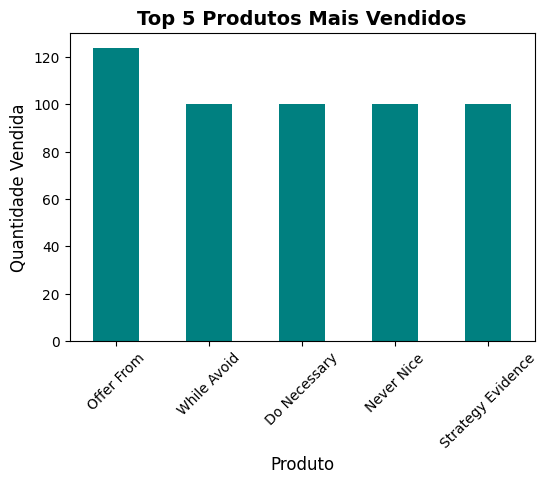

In [5]:
# Criar o gráfico de barras dos 5 produtos mais vendidos
plt.figure(figsize=(6,4))  
most_sold_products_sorted.head(5).plot(kind='bar', color='teal')  

plt.title('Top 5 Produtos Mais Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)

plt.xticks(rotation=45) 
plt.show()

### 2. Qual é a receita total por produto?

In [6]:
# Criar a coluna 'Revenue' multiplicando 'Price' por 'Quantity'
df['Revenue'] = df['Price'] * df['Quantity']

In [7]:
# Agrupar os dados por 'Product Name' e somar a receita de cada produto
revenue_by_product = df.groupby('Product Name')['Revenue'].sum()

# Ordenar os produtos pela receita, do maior para o menor
revenue_by_product_sorted = revenue_by_product.sort_values(ascending=False) 

# Exibir os produtos mais vendidos por receita
print(revenue_by_product_sorted.head(5))  

Product Name
Value Develop        48270.11
Question Standard    47550.72
Majority If          47254.62
All Decade           46117.77
Bank Writer          44254.84
Name: Revenue, dtype: float64


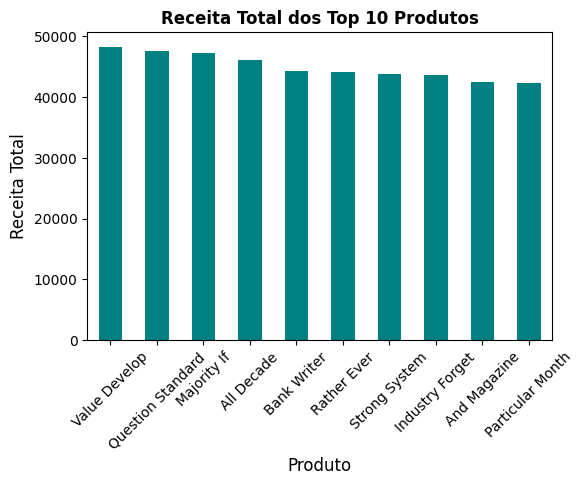

In [8]:
# Criar o gráfico de barras para a receita por produto
plt.figure(figsize=(6,4)) 
revenue_by_product_sorted.head(10).plot(kind='bar', color="teal")  

plt.title('Receita Total dos Top 10 Produtos', fontsize=12, fontweight='bold')  
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)

plt.xticks(rotation=45)
plt.show()

### 3. Qual é o desempenho de vendas por região?

In [9]:
sales_by_region = df.groupby('Region')['Quantity'].sum()
print(sales_by_region)

Region
Nordeste          12594
Rio de Janeiro    11954
Sul               13502
São Paulo         13444
Name: Quantity, dtype: int64


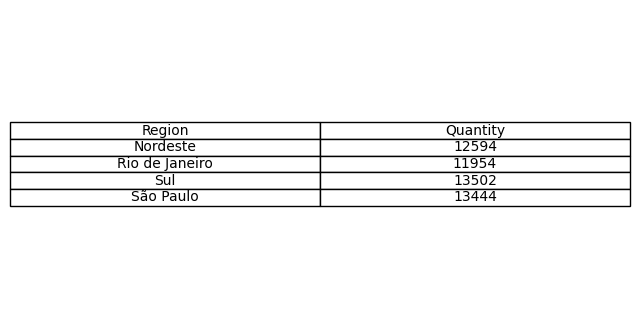

In [10]:
# Criar o gráfico de tabela para as vendas por região
fig, ax = plt.subplots(figsize=(8, 4))  

# Esconde os eixos, pois estamos criando uma tabela
ax.axis('tight') # faz a tabela ocupar a área mínima necessária para ser exibida
ax.axis('off') # Desliga a exibição dos eixos X e Y

# Criar a tabela a partir dos dados de vendas por região
table_data = sales_by_region.reset_index()  # Resetando (transformar o índice atual em uma coluna normal) o índice para ter uma coluna 'Região' na tabela

# Gerando a tabela
ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center', colLoc='center')

# ax.table -> cria a tabela dentro da figura
# cellText=table_data.values -> passa os valores das células da tabela
# colLabels=table_data.columns -> passa os nomes das colunas
# loc='center' -> isso posiciona a tabela no centro da área do gráfico.
# cellLoc='center' -> isso alinha o conteúdo das células da tabela ao centro
# colLoc='center' -> isso alinha o cabeçalho das colunas da tabela ao centro

plt.show()

### 4. Qual é o impacto das promoções nas vendas?

In [11]:
sales_by_promotion = df.groupby('Promotion')['Quantity'].sum()
print(sales_by_promotion)

Promotion
Black Friday           14143
Liquidação de Verão    13108
Nenhuma                12166
Promoção de Natal      12077
Name: Quantity, dtype: int64


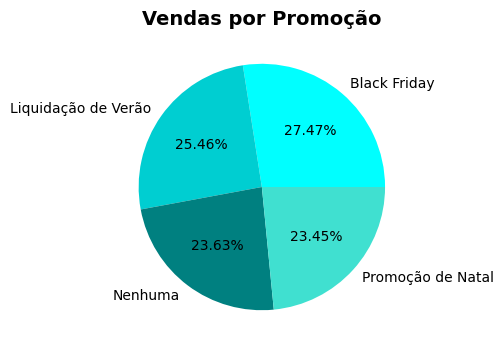

In [12]:
# Criar o gráfico de pizza para as vendas por promoção
plt.figure(figsize=(5,5))  
sales_by_promotion.plot(kind='pie', autopct='%1.2f%%', colors=['cyan', 'darkturquoise', 'teal', 'turquoise'], figsize=(4,4))

plt.title('Vendas por Promoção', fontsize=14, fontweight='bold')
plt.xlabel('')  
plt.ylabel('')  

plt.show()

## 5. Como as vendas se distribuem ao longo do ano?

In [13]:
sales_by_month = df.groupby('Month of Sale')['Quantity'].sum()
print(sales_by_month)

Month of Sale
1    28103
2    23391
Name: Quantity, dtype: int64


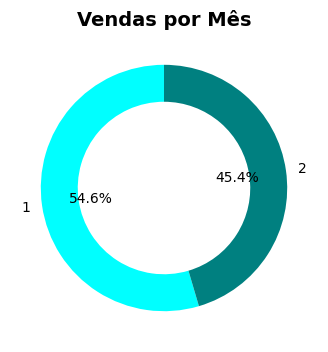

In [14]:
# Criando o gráfico de rosca
colors = ['cyan', 'teal']

plt.figure(figsize=(4,4))

# Criar o gráfico de rosca com os nomes dos meses diretamente
plt.pie(sales_by_month, labels=sales_by_month.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3}, colors = colors)

plt.title('Vendas por Mês', fontsize=14, fontweight='bold')

plt.show()

### 6. Qual método de pagamento é mais utilizado?

In [15]:
payment_method_distribution = df['Payment Method'].value_counts()
print(payment_method_distribution)

Payment Method
Boleto               274
Pix                  249
Dinheiro             245
Cartão de Crédito    232
Name: count, dtype: int64


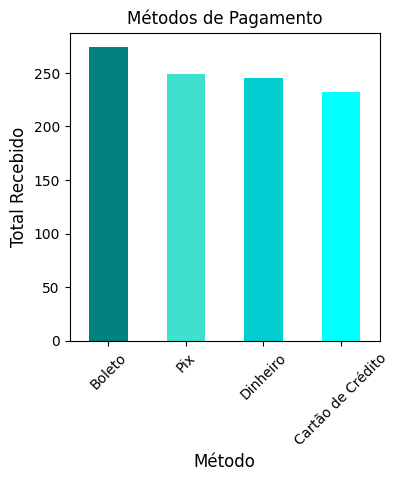

In [16]:
# Definindo as cores das barras (uma cor diferente para cada barra)
colors = ['teal', 'turquoise', 'darkturquoise', 'cyan']  

plt.figure(figsize=(4,4))
payment_method_distribution.plot(kind = 'bar', color = colors)

plt.title('Métodos de Pagamento', fontsize=12)
plt.xlabel('Método', fontsize=12)
plt.ylabel('Total Recebido', fontsize=12)

plt.xticks(rotation=45)
plt.show()

### 7. Qual a distribuição de descontos aplicados nas vendas?

In [17]:
discount_distribution = df['Discount'].value_counts()
print(discount_distribution)

Discount
20    273
10    259
5     242
0     226
Name: count, dtype: int64


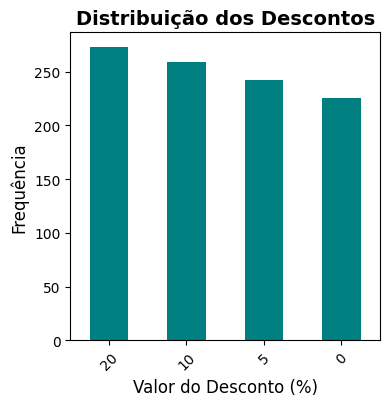

In [18]:
# Criando o gráfico de barras
plt.figure(figsize=(4,4))
discount_distribution.plot(kind='bar', color='teal')

# Títulos e rótulos
plt.title('Distribuição dos Descontos', fontsize=14, fontweight='bold')
plt.xlabel('Valor do Desconto (%)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.show()


### 8. Quais vendedores estão gerando mais vendas?

In [19]:
sales_by_representative = df.groupby('Sales Representative')['Revenue'].sum()
print(sales_by_representative.sort_values(ascending=False))

Sales Representative
Samuel Collins      48270.11
Amy Wallace         47550.72
Amanda Pena         47254.62
Brenda Kerr         46117.77
Andrew Burke        44254.84
                      ...   
Sonia Williams        103.05
Lisa Hernandez         73.42
Sherry Andrews         49.96
Clinton Martinez       43.82
Kathleen White         28.60
Name: Revenue, Length: 998, dtype: float64


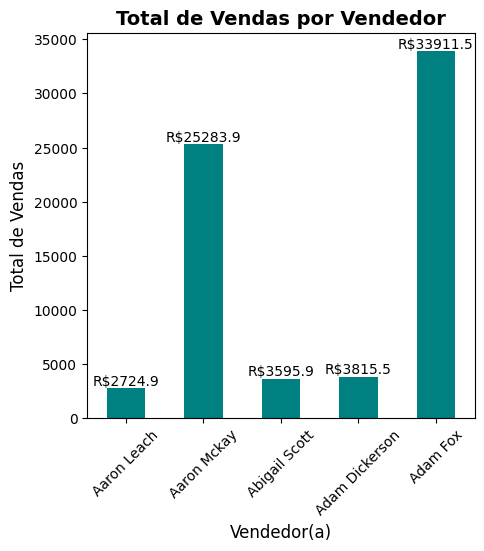

In [20]:
plt.figure(figsize=(5,5))
ax = sales_by_representative.head(5).plot(kind='bar', color='teal')

plt.title('Total de Vendas por Vendedor', fontsize=14, fontweight='bold')
plt.xlabel('Vendedor(a)', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)

# Formatação dos rótulos para incluir "R$"
labels = [f'R${x:.1f}' for x in sales_by_representative.head(5)]  # Formatar os valores com "R$"

# Adicionando os rótulos de dados usando bar_label com o prefixo "R$"
ax.bar_label(ax.containers[0], labels=labels, fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

### 9. Qual é a relação entre descontos e quantidade de vendas?

In [21]:
discount_sales_correlation = df[['Discount', 'Quantity']].corr()
print(discount_sales_correlation)

          Discount  Quantity
Discount   1.00000   0.02711
Quantity   0.02711   1.00000


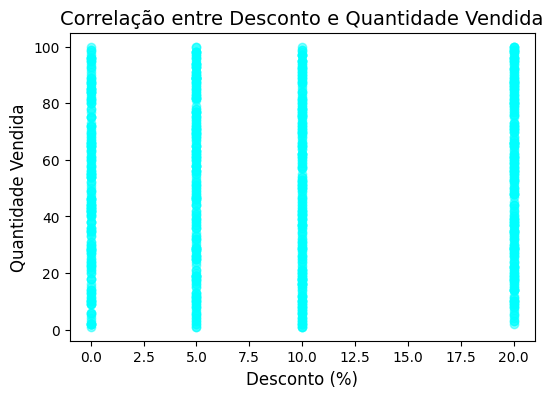

In [22]:
plt.figure(figsize=(6,4))

# Criar o gráfico de dispersão
plt.scatter(df['Discount'], df['Quantity'], color='cyan', alpha=0.5)

plt.title('Correlação entre Desconto e Quantidade Vendida', fontsize=14)
plt.xlabel('Desconto (%)', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)

plt.show()

### Explicação do Gráfico acima

In [23]:
#### Agrupamento dos pontos: Os valores de desconto parecem ser discretos (0%, 5%, 10%, 20%), o que cria colunas verticais de pontos.
#### Isso indica que os descontos foram aplicados apenas em níveis específicos, em vez de serem valores contínuos.

#### O valor da correlação entre Desconto e Quantidade Vendida é 0.02711.
#### Isso indica que praticamente não há uma relação linear entre essas variáveis.
#### Em outras palavras, aumentar ou diminuir o desconto não parece ter um impacto direto e previsível na quantidade vendida.

#### Aqui as linhas verticais estão bem parecidas porque a distribuição de vendas é quase a mesma por Desconto, como observando em gráficos anterioes.

In [24]:
# Resumo Estatístico da coluna 'Quantidade'
print(df['Quantity'].describe())

count    1000.000000
mean       51.494000
std        28.760479
min         1.000000
25%        27.000000
50%        52.000000
75%        77.000000
max       100.000000
Name: Quantity, dtype: float64


In [25]:
# Salvar os resultados para um arquivo HTML
!jupyter nbconvert --to html dadoscomerciais.ipynb

[NbConvertApp] Converting notebook dadoscomerciais.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 659165 bytes to dadoscomerciais.html


In [26]:
# Salvar os resultados para um arquivo csv
df.to_csv('dados_comerciais.csv', index = False)

In [27]:
# Salvar os resultados para um arquivo pdf
!jupyter nbconvert --to pdf dadoscomerciais.ipynb

[NbConvertApp] Converting notebook dadoscomerciais.ipynb to pdf
[NbConvertApp] Support files will be in dadoscomerciais_files\
[NbConvertApp] Making directory .\dadoscomerciais_files
[NbConvertApp] Writing 53277 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 283477 bytes to dadoscomerciais.pdf
